**Capstone project**





Name: Maheswara Rao Dollu

# **Diabetes Disease Classification**

**classifying whether a person has diabetes or not.**

**Dataset Link:https://diabetesatlas.org/data/en/country/211/us.html **

Here, we are importing  the required necessary Libraries !

In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the data set

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

# Exploring the dataset

In [ ]:
df.shape

(2000, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.62250,3.185289,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [ ]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Renaming our data set

In [ ]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF','BloodPressure':'BP'})
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df['Outcome'].value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [ ]:
for col in df.columns:
  print("The minimum value fore the columns {} is {}".format(col, df[col].min()))

The minimum value fore the columns Pregnancies is 0
The minimum value fore the columns Glucose is 0
The minimum value fore the columns BP is 0
The minimum value fore the columns SkinThickness is 0
The minimum value fore the columns Insulin is 0
The minimum value fore the columns BMI is 0.0
The minimum value fore the columns DPF is 0.078
The minimum value fore the columns Age is 21
The minimum value fore the columns Outcome is 0


# Data Cleaning

Removing the Null values and text data from the data!



In [ ]:
# Replacing the 0 values from ['Glucose','BP','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BP','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BP','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BP                90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

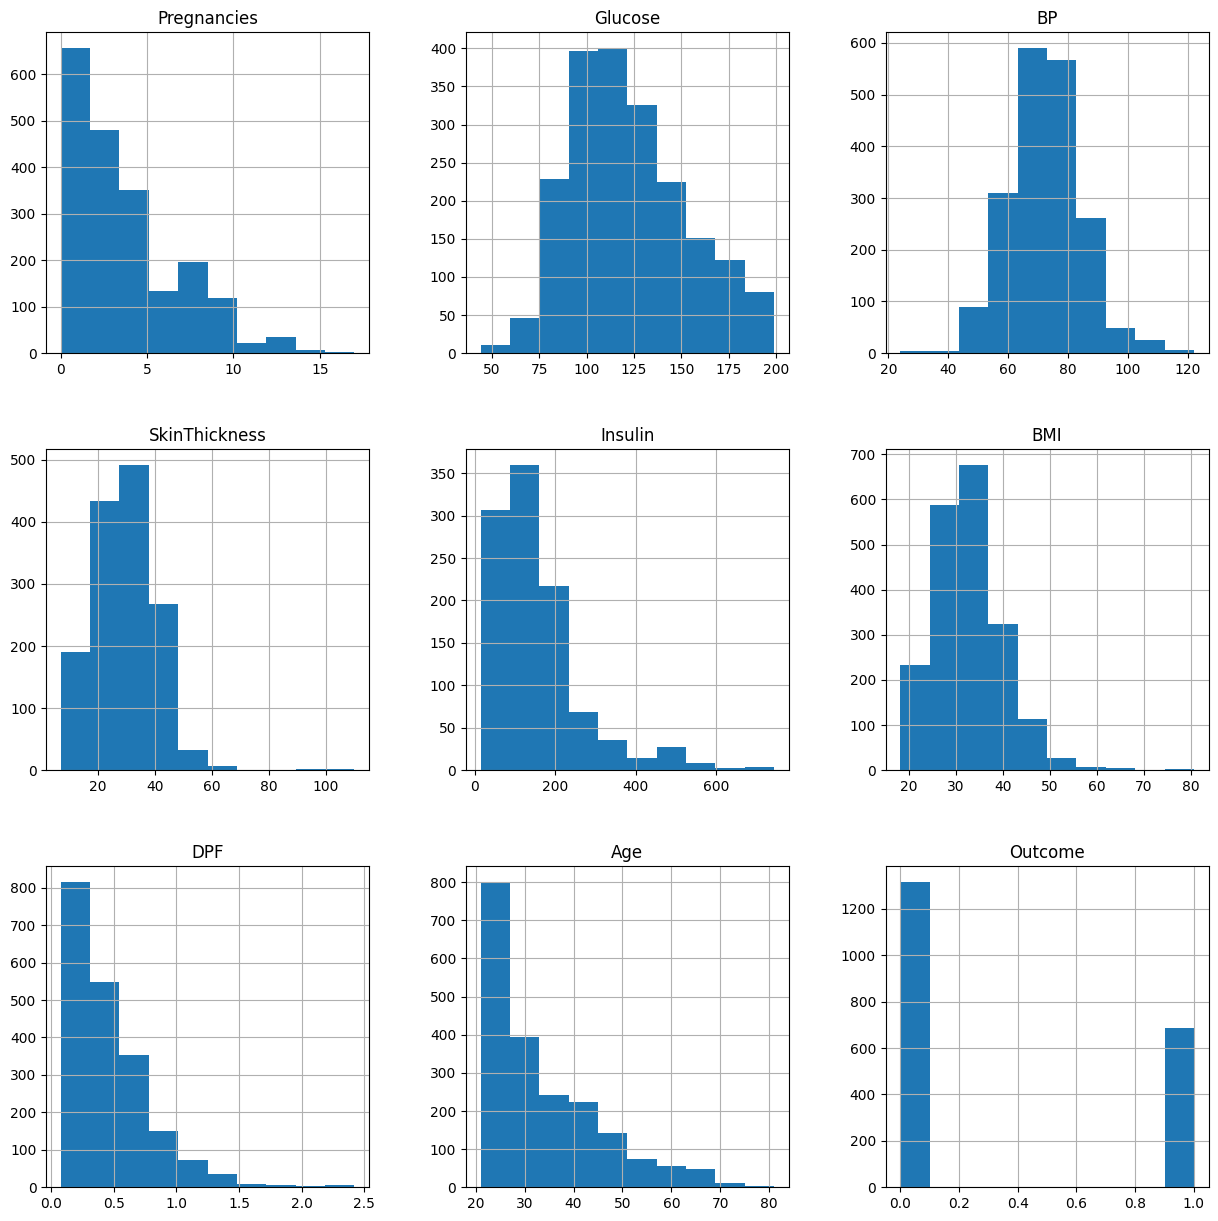

In [ ]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

Columns like Pregnancies, Glucose, BloodPressure, SkinThickness and BMI are not that much skewed. We can fill null values with the mean for these columns, but for columns like Insulin and DiabetesPedigreeFunction, we will have to replace them will median due to the effect of skewness.

In [ ]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BP'].fillna(df_copy['BP'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

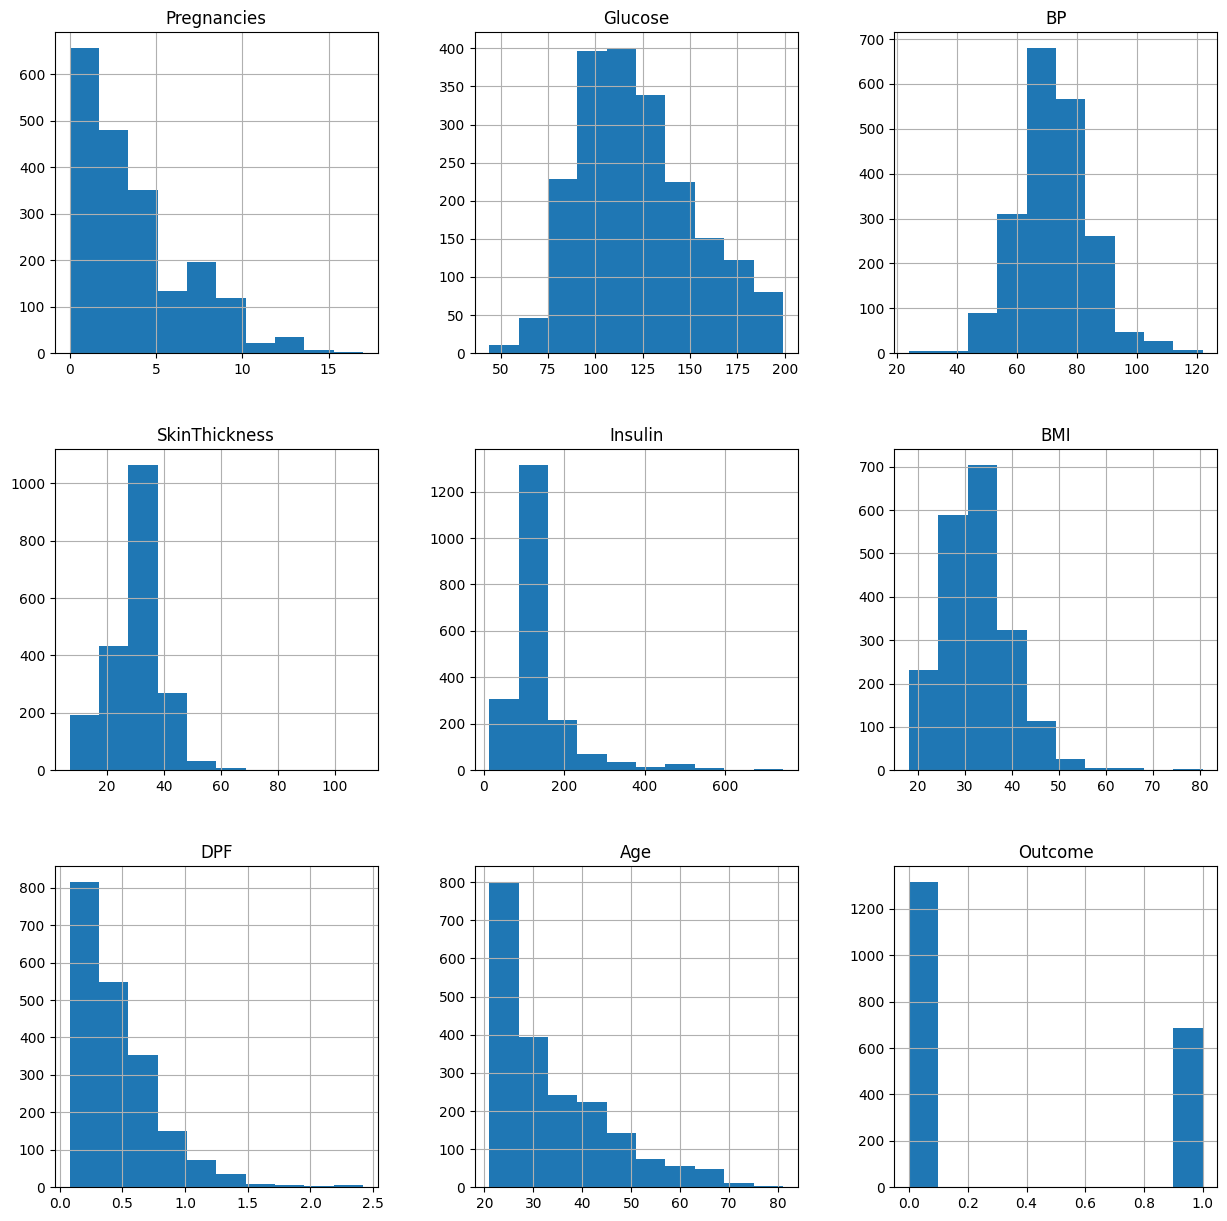

In [ ]:
# Plotting histogram of dataset after replacing NaN values
p = df_copy.hist(figsize=(15,15))

**Performing some EDA on Data Set**

<Axes: >

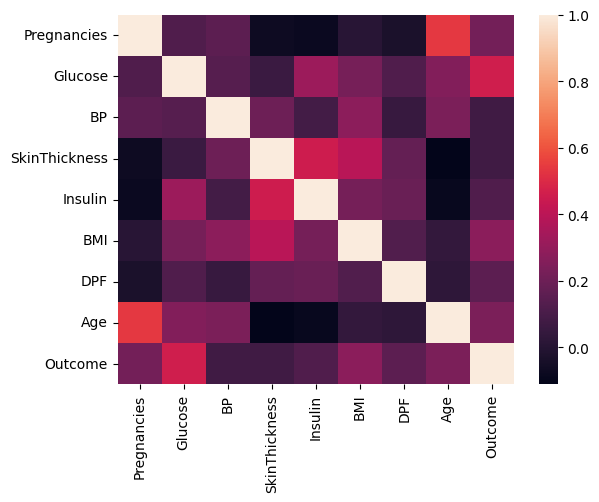

In [ ]:
sns.heatmap(df.corr())

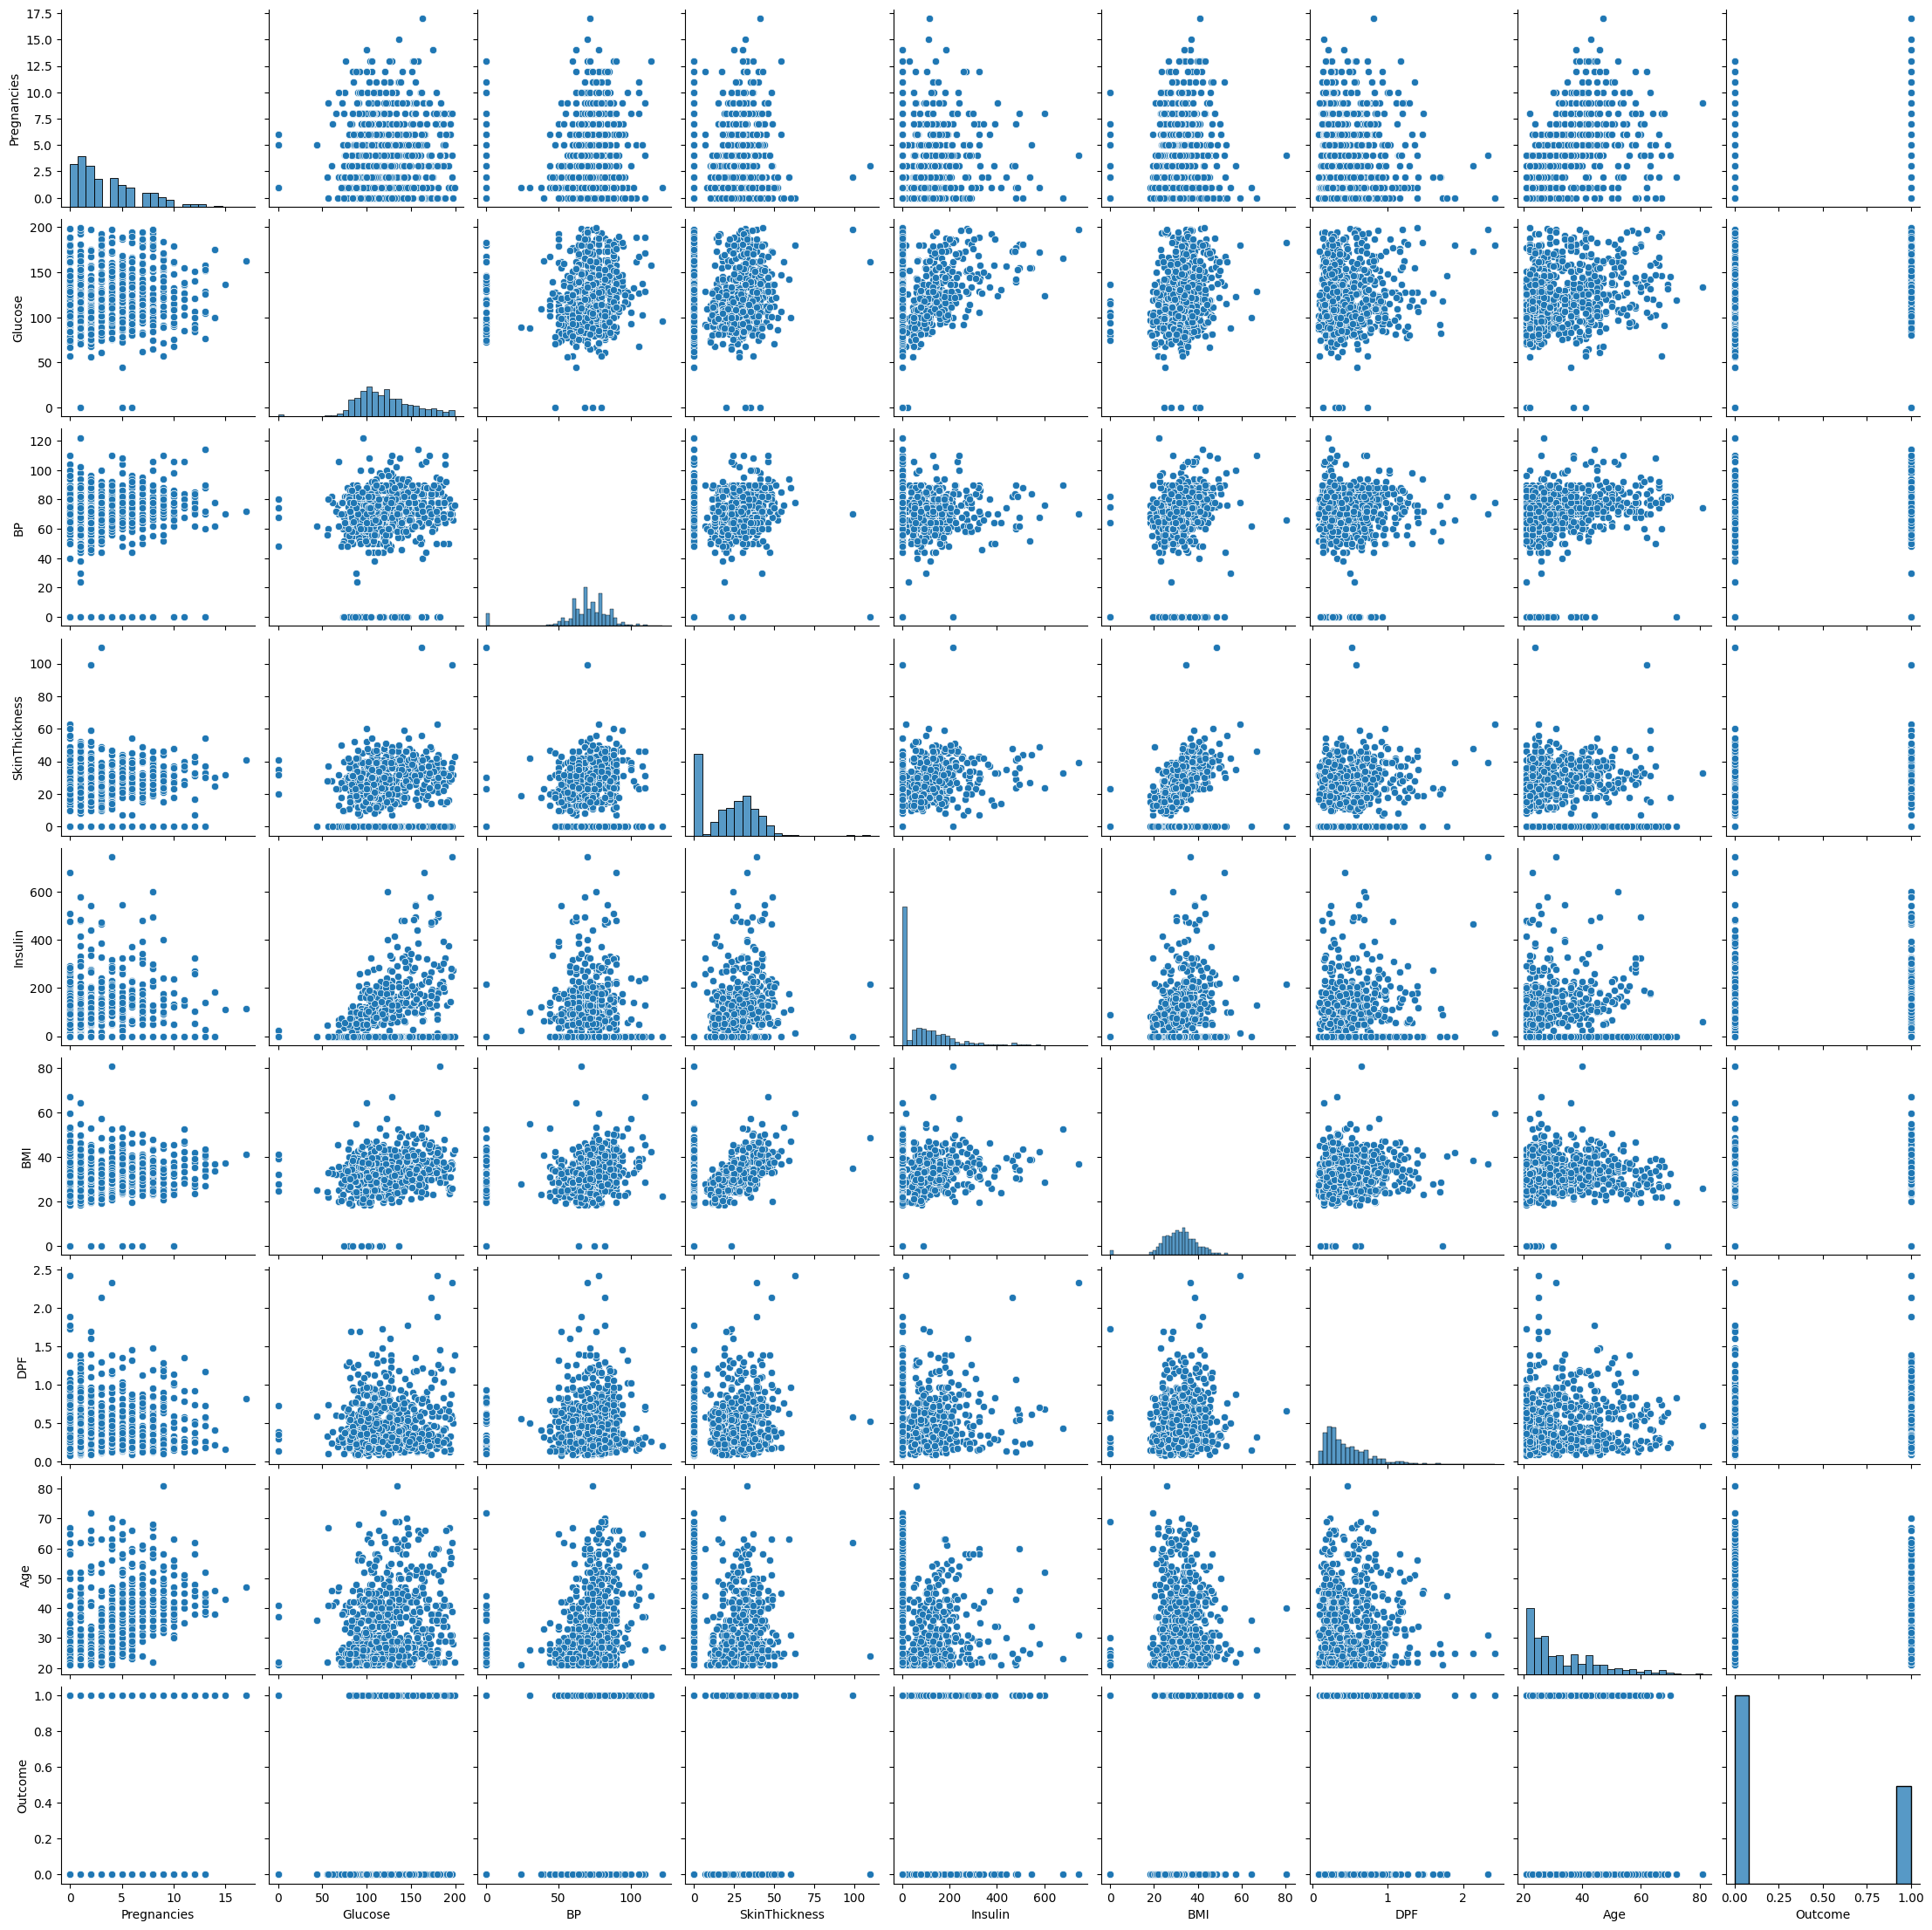

In [ ]:
sns.pairplot(df)

<Axes: xlabel='Pregnancies', ylabel='Density'>

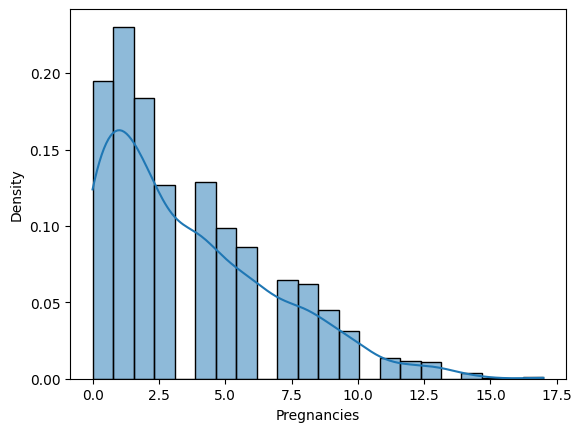

In [ ]:
sns.histplot(df['Pregnancies'],kde=True, stat="density")

In [ ]:
def mean_target(var):
    result = df.groupby('Outcome')[var].mean().reset_index()
    return pd.DataFrame(result)


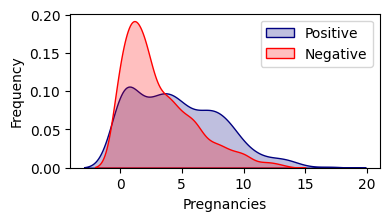

In [ ]:
# Explore Pregnancies vs Outcome
plt.figure(figsize=(4,2))
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1],
     color="navy",fill = True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0],
     ax =g, color="red", fill= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

In [ ]:
mean_target('Pregnancies')

,Outcome,Pregnancies
0,0,3.123860
1,1,4.581871


We can see that the number of pregnancies is high for the diabetic people



In [ ]:
mean_target('Insulin')

,Outcome,Insulin
0,0,70.563830
1,1,98.897661


Diabetic People tend to have more Insulin level.



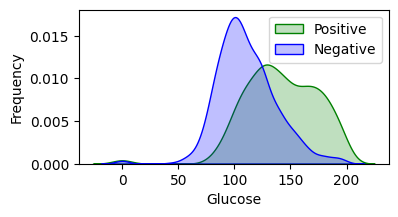

In [ ]:
plt.figure(figsize=(4,2))
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color="green", fill = True)
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], ax =g, color="blue", fill= True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

In [ ]:
mean_target('Glucose')

,Outcome,Glucose
0,0,110.586626
1,1,141.568713


Diabetic people tend to have more Glucose level

Diabetes Count

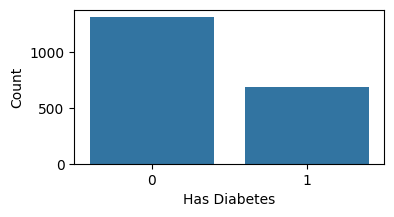

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(x='Outcome', data=df)
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

As we know age increases diabeties also icreases,we would know what is the effect of Age on the Outcome because we have heard that as the age increases, the chances of diabetes also commonly increases.

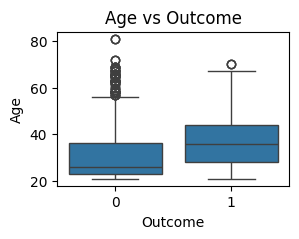

In [ ]:
plt.figure(figsize=(3,2))
sns.boxplot(x = 'Outcome', y = 'Age', data = df)
plt.title('Age vs Outcome')
plt.show()

we can see median of non diabetic people with ages lies near to diabetic people

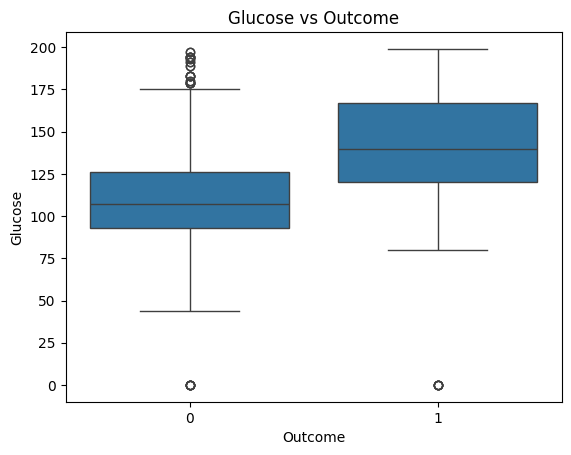

In [ ]:
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df)
plt.title('Glucose vs Outcome')
plt.show()

the median of the Glucose level of Diabetic People is greater than the 75th Percentile of the glucose level of non-diabetic people. Therefore having a high glucose level does increase the chances of having diabetes.

 The chances of diabetes is gradually increasing with level of Glucose.

<Axes: xlabel='Glucose', ylabel='BMI'>

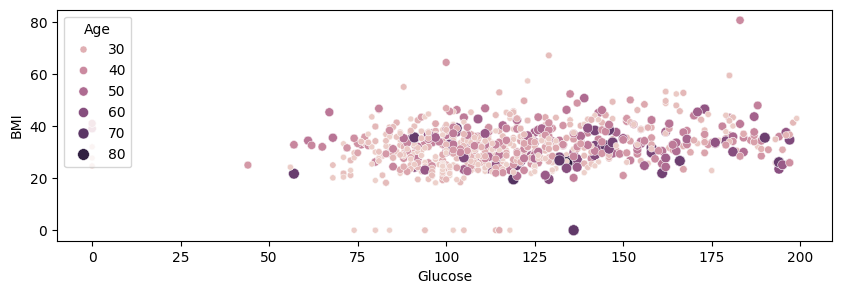

In [ ]:
# Glucose vs BMI vs Age
plt.figure(figsize=(10,3))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Age", size="Age")

In [ ]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [ ]:
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


#**Model Building**

#**Training our Model**

Let's now begin to train our model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Outcome column.

Lets assume x is input values and Y is outPut value! !

#**Training, Testing and Split**

Let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

Lets import train_test_split from sklearn

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Importing all classification Algorithms using Sklearn**

In [ ]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Now, Here we are finding our Best classification Algorithm Using GridSearchCV that the data should fit and high accuracy !

In [ ]:
def find_best_model(X, y):
    models = {
        'logistic_regression': LogisticRegression(solver='lbfgs', multi_class='auto'),
        'decision_tree': DecisionTreeClassifier(splitter='best'),
        'random_forest': RandomForestClassifier(criterion='gini'),
        'svm': SVC(gamma='auto')
    }

    parameters = {
        'logistic_regression': {
            'C': [1,5,10]
        },

        'decision_tree': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5,10]
        },

        'random_forest': {
            'n_estimators': [10,15,20,50,100,200]
        },

        'svm': {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model in models.items():
        gs = GridSearchCV(model, parameters[model_name], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.763750
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.899375
2,random_forest,{'n_estimators': 20},0.951875
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.866875


**Since the Random Forest algorithm has the highest accuracy, we futher fine tune the model using hyperparameter optimization.**


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


In [ ]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

# Model Evaluation

for  model Evaluation we must do the confusion matrix, report and accuracy score

Importing the required pacakges using sklearn

In [ ]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[270,   2],
       [  5, 123]])

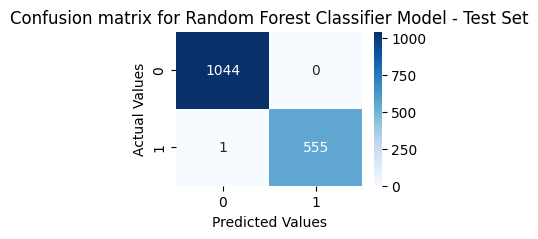

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(3,2))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 98.25%


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       272
           1       0.98      0.96      0.97       128

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [ ]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1044,    0],
       [   1,  555]])

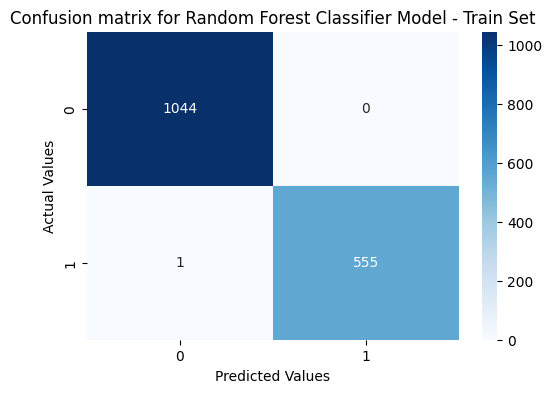

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(6,4))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on training set: {}%".format(score))

Accuracy on training set: 99.94%


In [ ]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



# Predictions

Finally append new feature column in test dataset called outcome and print the dataset.Here 1 is person facing diabeties if not he as no diabeties !

In [ ]:
df

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BP)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    X = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    X = sc.transform(X)

    return classifier.predict(X)

In [ ]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(0, 129, 110, 46, 130, 67.1, 0.391, 26)
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Oops! You have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Prediction 3
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Iam Sorry to say! You have diabetes.')
else:
  print("Great you are Alright! You don't have diabetes.")

Iam Sorry to say! You have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Prediction 4
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 139, 62, 41, 480, 40.5, 0.536, 21)[0]
if prediction:
  print('Iam Sorry to say! You have diabetes.')
else:
  print("Great you are Alright! You don't have diabetes.")

Great you are Alright! You don't have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
df

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
